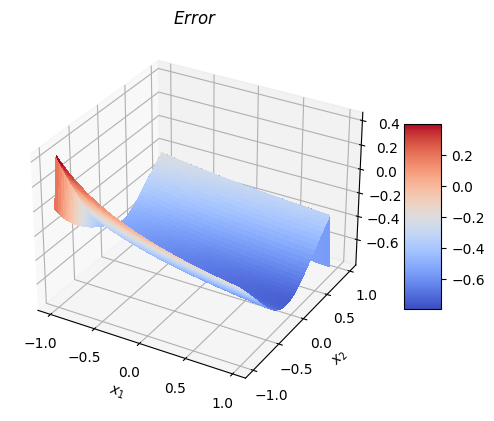

--- 5.108083248138428 seconds ---


In [1]:
import time
start_time = time.time()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

alpha = -1
beta = 1
h = 0.04
N = 50

x1 = np.arange(alpha, beta, 0.01)
x2 = np.arange(alpha, beta, 0.01)
x1, x2 = np.meshgrid(x1, x2)

g_bar = np.zeros((N*N, 1))
e_i1 = np.zeros((N, 1))
e_i2 = np.zeros((N, 1))

num = 0
den = 0
k = 0

def trimf(x, abc):
    return np.fmax(np.fmin((x-abc[0])/(abc[1]-abc[0]), (abc[2]-x)/(abc[2]-abc[1])), 0)

for i1 in range(1,N):
    for i2 in range(1,N):
        e_i1[i1-1,0] = -1 + h*(i1-1)
        e_i2[i2-1,0] = -1 + h*(i2-1)
        if i1==1:
            mu_A_x1 = trimf(x1, [-1,-1,-1+h])
        elif i1==N:
            mu_A_x1 = trimf(x1,[1-h, 1, 1])
        else:
            mu_A_x1 = trimf(x1,[-1+h*(i1-2), -1+h*(i1-1), -1+h*(i1)])

        if i2==1:
            mu_A_x2 = trimf(x2, [-1,-1,-1+h])
        elif i2==N:
            mu_A_x2 = trimf(x2,[1-h, 1, 1])
        else:
            mu_A_x2 = trimf(x2,[-1+h*(i2-2), -1+h*(i2-1), -1+h*(i2)])

        g_bar[k,0]= 1/(1+e_i1[i1, 0]**2+e_i2[i2, 0]**2)
        num = num + g_bar[k,0]*mu_A_x1*mu_A_x2
        den=den+mu_A_x1*mu_A_x2
        k=k+1

f_x = num/den
g_x = 1/(3 + x1 + x2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
ax.set_title('$Error$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('fuzzy1.svg')
plt.show()

# Print time of execution
print("--- %s seconds ---" % (time.time() - start_time))

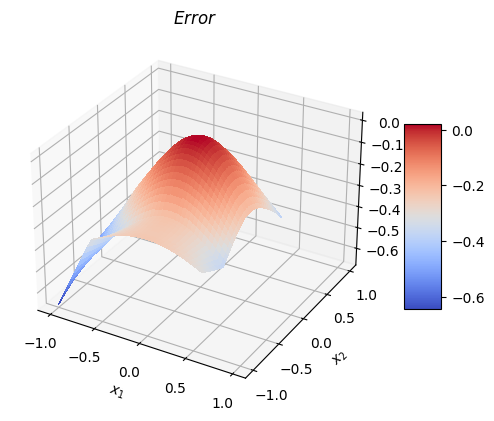

--- 3.796002149581909 seconds ---


In [2]:
import time
start_time = time.time()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

alpha = -1
beta = 1
h = 0.4
N = 5

x1 = np.arange(alpha, beta, 0.01)
x2 = np.arange(alpha, beta, 0.01)
x1, x2 = np.meshgrid(x1, x2)

g_bar = np.zeros((N*N, 1))
e_i1 = np.zeros((N, 1))
e_i2 = np.zeros((N, 1))

num = 0
den = 0
k = 0

def trimf(x, abc):
    return np.fmax(np.fmin((x-abc[0])/(abc[1]-abc[0]), (abc[2]-x)/(abc[2]-abc[1])), 0)

for i1 in range(1,N):
    for i2 in range(1,N):
        e_i1[i1-1,0] = -1 + h*(i1-1)
        e_i2[i2-1,0] = -1 + h*(i2-1)
        if i1==1:
            mu_A_x1 = trimf(x1, [-1,-1,-1+h])
        elif i1==N:
            mu_A_x1 = trimf(x1,[1-h, 1, 1])
        else:
            mu_A_x1 = trimf(x1,[-1+h*(i1-2), -1+h*(i1-1), -1+h*(i1)])

        if i2==1:
            mu_A_x2 = trimf(x2, [-1,-1,-1+h])
        elif i2==N:
            mu_A_x2 = trimf(x2,[1-h, 1, 1])
        else:
            mu_A_x2 = trimf(x2,[-1+h*(i2-2), -1+h*(i2-1), -1+h*(i2)])

        g_bar[k,0]= 1/(1+e_i1[i1, 0]**2+e_i2[i2, 0]**2)
        num = num + g_bar[k,0]*mu_A_x1*mu_A_x2
        den=den+mu_A_x1*mu_A_x2
        k=k+1

f_x = num/den
g_x = 1/(1+x1**2+x2**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, cmap=cm.coolwarm,
                            linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
ax.set_title('$Error$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('fuzzy2.svg')
plt.show()

# Print time of execution
print("--- %s seconds ---" % (time.time() - start_time))